In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [103]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [104]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [105]:
df = df.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)

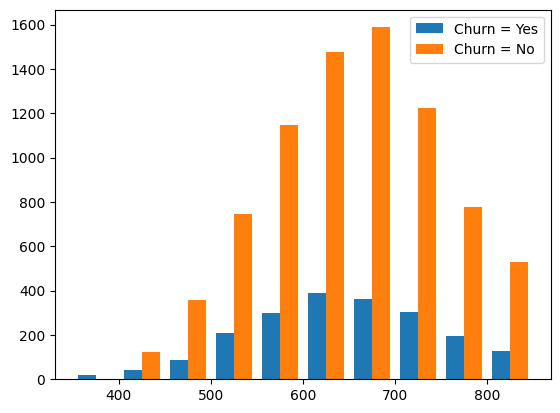

In [106]:
credit_churn = df[df['Exited'] == 1]['CreditScore']
credit_not_churn = df[df['Exited'] == 0]['CreditScore']
plt.hist([credit_churn, credit_not_churn], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

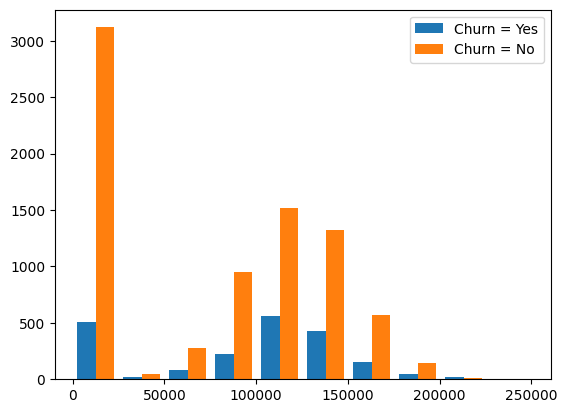

In [107]:
balance_churn = df[df['Exited'] == 1]['Balance']
balance_not_churn = df[df['Exited'] == 0]['Balance']
plt.hist([balance_churn, balance_not_churn], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

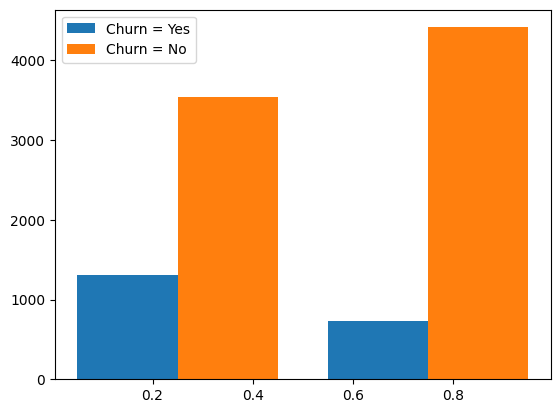

In [108]:
active_churn = df[df['Exited'] == 1]['IsActiveMember']
active_not_churn = df[df['Exited'] == 0]['IsActiveMember']
plt.hist([active_churn, active_not_churn], bins = 2, label = ['Churn = Yes', 'Churn = No'])
plt.legend()

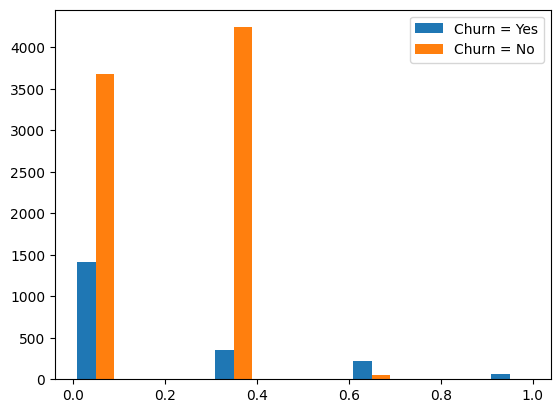

In [121]:
products_churn = df[df['Exited'] == 1]['NumOfProducts']
products_not_churn = df[df['Exited'] == 0]['NumOfProducts']
plt.hist([products_churn, products_not_churn], bins = 10, label = ['Churn = Yes', 'Churn = No'])
plt.legend()

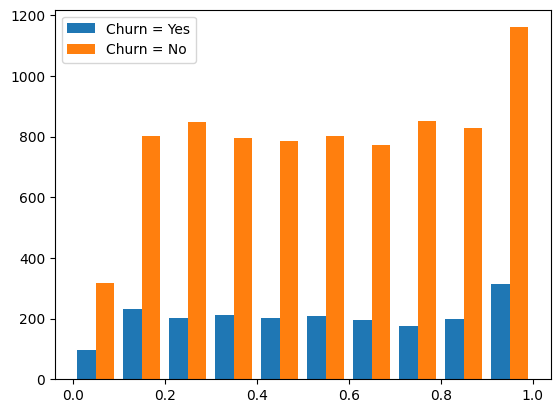

In [126]:
tenure_churn = df[df['Exited'] == 1]['Tenure']
tenure_not_churn = df[df['Exited'] == 0]['Tenure']
plt.hist([tenure_churn, tenure_not_churn], bins = 10, label = ['Churn = Yes', 'Churn = No'])
plt.legend()

In [110]:
df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [111]:
def print_unique_values(df):
  for column in df:
    if (df[column].dtypes == 'object'):
      print(column, " : ", df[column].unique())

In [112]:
print_unique_values(df)

Geography  :  ['France' 'Spain' 'Germany']
Gender  :  ['Female' 'Male']


In [113]:
df['Gender'] = df['Gender'].replace({'Female' : 0, 'Male' : 1})

/tmp/ipython-input-113-516437053.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female' : 0, 'Male' : 1})


In [114]:
df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
755,803,France,1,31,9,157120.86,2,1,0,141300.53,0
2596,833,France,0,28,4,136674.51,2,0,0,5278.78,0
8911,718,Germany,1,32,9,169947.41,2,1,1,27979.16,0


In [115]:
df = pd.get_dummies(df, dtype = int)

In [116]:
df.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6113,596,1,36,2,0.00,2,0,1,125557.95,0,0,0,1
9516,557,0,32,3,123502.53,1,1,1,69826.80,0,1,0,0
7405,556,1,34,8,163757.06,1,1,1,104000.06,0,1,0,0


In [117]:
scaler = MinMaxScaler()
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [128]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited', axis = 1), df['Exited'], train_size = 0.8)

In [129]:
X_train.shape

(8000, 12)

In [130]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [132]:
model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8129 - loss: 0.4329
Epoch 2/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8197 - loss: 0.4140
Epoch 3/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8134 - loss: 0.4203
Epoch 4/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8262 - loss: 0.4145
Epoch 5/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8275 - loss: 0.4064
Epoch 6/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8406 - loss: 0.3881
Epoch 7/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8393 - loss: 0.3795
Epoch 8/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8460 - loss: 0.3689
Epoch 9/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8544 - loss: 0.3652
Epoch 10/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8524 - loss: 0.3621
Epoch 11/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8580 - loss: 0.3564
Epoch 12/200
250/250 ━━━━━━━━━━━━━━━━━━━━

In [133]:
ypred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [135]:
y_pred = (ypred >= 0.5).astype(int)
y_pred = y_pred.reshape(y_pred.shape[0],)

In [137]:
np.mean(y_pred == y_test)

np.float64(0.862)

<Axes: >

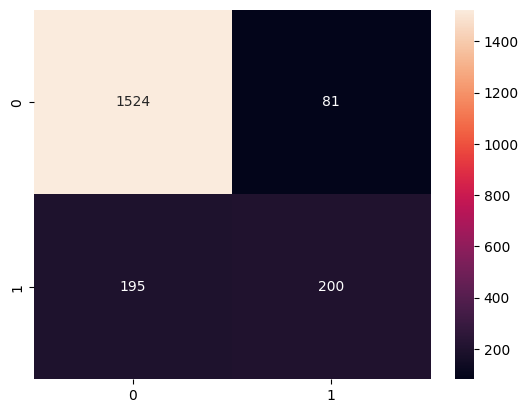

In [142]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1605
           1       0.71      0.51      0.59       395

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [146]:
(df['Exited'] == 1).sum()

np.int64(2037)

In [147]:
(df['Exited'] == 0).sum()

np.int64(7963)